# Classification & Metrics

Pipeline classification
- get data
- extract feature
- train model
- test model
- deploy model

Metrics
- TP/FP/TN/FN
- tp_rate
- fp_rate
- roc_curve
- auc
- precision
- recall
- pr_curve
- ap
- f1
- confusion_metrics

In [1]:
!pip install botnoi==0.2.1

     |████████████████████████████████| 16.0MB 292kB/s 


In [2]:
import botnoi as bn

In [3]:
imgo = bn.cv.image('https://www.dailynews.co.th/admin/upload/20200817/news_epYGJKEltT114616_533.jpg')

In [ ]:
# bn.cv.image is an object can access methods (getimage, getresnet50, get)

imgo.

In [6]:
from botnoi import scrape as sc
from botnoi import cv
import os

In [9]:
# boinoi has a library webscrapper called scrape (sc for short)
# quick for generating a data set for IMAGE CLASSIFICATION

len(sc.get_image_urls('หมา', nres=10))

complete: 0.00%
completed


57

In [84]:
# how to get 10 url pictures of lebron james

sc.get_image_urls('lebron james', nres=10)[0:10]

complete: 0.00%
completed


['https://clutchpoints.com/wp-content/uploads/2020/08/Warriors-news-Klay-Thompson-LeBron-James-share-playful-exchange-after-Lakers-star_s-playoff-record.jpg',
 'https://cdn.cnn.com/cnnnext/dam/assets/200302114317-lebron-james-la-lakers-super-tease.jpg',
 'https://s22928.pcdn.co/wp-content/uploads/2020/01/lebron-james-18.jpg',
 'https://clutchpoints.com/wp-content/uploads/2020/03/LeBron-James_-Donations-Over-The-Years.jpg',
 'https://nba.nbcsports.com/wp-content/uploads/sites/12/2020/07/GettyImages-1226998975-e1595291231621.jpg',
 'https://sportshub.cbsistatic.com/i/r/2020/09/24/b3c4d850-120c-4305-a2e8-d970435d5bb7/thumbnail/1200x675/4957ab396c7c8074612c097cf6889ac2/lebron-james-1.jpg',
 'https://e0.365dm.com/20/08/2048x1152/skysports-lebron-james-los-angeles-lakers_5076643.jpg',
 'https://thesportsrush.com/wp-content/uploads/2020/09/LeBron-james-and-Michael-Jordan.jpg',
 'https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iIQ4IS5sO60E/v1/1000x-1.jpg',
 'https://www.rollingstone.com/wp-co

In [ ]:
# imgo short for image object - can access getimage() method

imgo.getimage()

In [ ]:
imgo.getmobilenet()

17227776/17225924 [==============================] - 0s 0us/step


array([9.18362877e-08, 7.81893275e-06, 1.77856458e-06, 2.18909719e-06,
       1.02652057e-07, 1.61265725e-06, 8.95382561e-07, 6.71178436e-06,
       3.26171731e-06, 2.04340337e-06, 1.23670189e-06, 1.70463489e-06,
       8.31192729e-07, 1.79687414e-07, 4.20546221e-06, 4.07946259e-07,
       1.00654930e-06, 3.04628866e-06, 3.94983903e-07, 3.24897466e-07,
       1.91298766e-08, 5.95046697e-07, 1.17160572e-07, 2.87200479e-07,
       9.85996435e-08, 7.40177848e-08, 8.00234576e-08, 5.40304942e-07,
       4.18063755e-08, 4.79673660e-08, 6.85557139e-09, 1.62672756e-06,
       4.28071493e-09, 3.44190553e-07, 2.12148568e-07, 3.50784869e-08,
       3.26399036e-07, 5.31002262e-07, 2.24148240e-06, 1.75667205e-08,
       4.59163732e-06, 1.63673413e-07, 1.02884139e-07, 1.08859198e-07,
       6.90184862e-08, 8.60833057e-07, 1.90796374e-07, 2.53587950e-07,
       5.74822877e-08, 4.73836723e-08, 2.96615049e-08, 4.05191810e-07,
       3.43185816e-06, 1.31565782e-06, 2.49016784e-07, 4.02136984e-06,
      

In [ ]:
from botnoi import scrape as sc
from botnoi import cv
import os

In [ ]:
from botnoi import scrape as sc

In [ ]:
sc.get_image_urls('หมา')

In [12]:
import os
def extractimagefeat(query,nimg=20):
  #create folder
  foldername = 'images/'+query
  isdir = os.path.isdir(foldername)
  #check if folder exist
  if not isdir:
    #create directory
    os.makedirs(foldername)
  #get images from google search
  imglist = sc.get_image_urls(query)
  i = 1
  for img in imglist[0:nimg]:
    #extract image features from each images and save to files
    try:
      #create image path - p stands for 'pickle', a python object
      savepath = foldername + '/' + str(i)+'.p'
      print(savepath)
      # a is an object with classes
      a = cv.image(img)
      # .getresnet50() is a deep learning architecture to turn img into pixels - to get feature set (turn image into numbers)
      a.getresnet50()
      a.save(savepath)
      i = i + 1
    except:
      pass
  return 'complete'


In [ ]:
extractimagefeat('ผู้หญิง',30)

In [ ]:
extractimagefeat('ญาญ่า', 30)

In [20]:
import pickle

# dat becomes a botnoi.cv.image object; cv.image builds an object image
# rb means 'read binary'
dat = pickle.load(open('images/ญาญ่า/10.p','rb'))

print(dat)

# New Section

In [ ]:
#command to clear or files
!rm -rf images/*

In [22]:
import glob
import pandas as pd
import pickle
def createdataset():
  imgfolder = glob.glob('images/*')
  #return imgfolder
  dataset = []
  for cls in imgfolder:
    clsset = pd.DataFrame()
    pList = glob.glob(cls+'/*')
    #return pList
    featvec = []
    for p in pList:
      dat = pickle.load(open(p,'rb'))
      #return dat
      featvec.append(dat.resnet50)
    #return featvec
    #featvec = np.vstack(featvec)
    clsset['feature'] = featvec
    #return cls
    cls = cls.split('/')[-1]

    clsset['label'] = cls
    #return clsset
    dataset.append(clsset)
  #return dataset
  return pd.concat(dataset,axis=0)

In [ ]:
#imgfolder = glob.glob('images/ญาญ่า/*')

In [23]:
cls = createdataset()

In [24]:
cls

,feature,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001147219551...",ผู้หญิง
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
3,"[0.0, 0.0012085173106092973, 0.0, 0.0, 0.0, 0....",ผู้หญิง
4,"[0.0, 0.0006985944172754933, 0.0, 0.0, 0.0, 0....",ผู้หญิง
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",ผู้หญิง
9,"[0.0, 0.0, 0.001339149346140866, 0.00083828679...",ผู้หญิง


## Train model

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
def trainmodel(dataset,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset['feature'], dataset['label'], test_size=0.33, random_state=42)
  #return trainfeat,testfeat,trainlabel,testlabel
  clf = LinearSVC()
  clf = CalibratedClassifierCV(clf) 
  # fit the model
  mod = clf.fit(np.vstack(trainfeat.values),trainlabel.values)
  #return model
  res = mod.predict(np.vstack(testfeat.values))
  #return res,testlabel
  if modfile!='':
    pickle.dump(mod,open(modfile,'wb'))
  
  #return res, testlabel (accuracy and confidence)
  acc = sum(res == testlabel)/len(res)
  conf = mod.predict_proba(np.vstack(testfeat.values))
  return mod,acc,conf,testlabel

In [ ]:
mod,acc,conf,testlabel = trainmodel(cls,'dogcat.mod')

In [ ]:
testlabel

0     ผู้หญิง
5     ผู้หญิง
5      ผู้ชาย
13    ผู้หญิง
19    ผู้หญิง
22     ผู้ชาย
8      ผู้ชาย
26    ผู้หญิง
16     ผู้ชาย
12    ผู้หญิง
26     ผู้ชาย
3     ผู้หญิง
6      ผู้ชาย
2      ผู้ชาย
8     ผู้หญิง
17    ผู้หญิง
6     ผู้หญิง
4     ผู้หญิง
13     ผู้ชาย
Name: label, dtype: object

In [ ]:
acc

0.8421052631578947

In [82]:
lab = (testlabel=='ผู้ชาย').astype('int')

In [75]:
prob = conf[:,0]

In [76]:
prob

array([0.75978642, 0.32687773, 0.85229001, 0.67032909, 0.22497647,
       0.53499367, 0.74273726, 0.11002985, 0.05666797, 0.19314345,
       0.19621659, 0.74001682])

In [77]:
from sklearn.metrics import precision_recall_curve

In [78]:
precision, recall, thresholds = precision_recall_curve(lab,prob)

In [80]:
import pylab as py

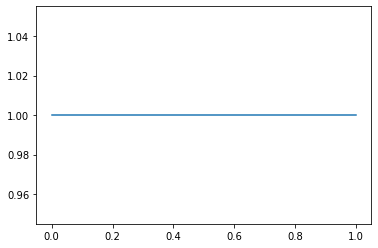

In [81]:
py.plot(recall,precision)

In [42]:
!rm -rf images/*

In [43]:
#pipeline to create model

clsList = ['นก','หมา'] #define problem
for c in clsList:
  extractimagefeat(c,20) #extract feature
imgfolder = ['images/'+c for c in clsList]
dataset = createdataset()
modFile = 'noodle.p'
mod,acc,conf,testlabel = trainmodel(dataset,modFile) #train model

complete: 0.00%
complete: 96.00%
completed
images/นก/1.p
images/นก/1.p
images/นก/2.p
images/นก/2.p
images/นก/3.p
images/นก/4.p
images/นก/5.p
images/นก/6.p
images/นก/7.p
images/นก/8.p
images/นก/9.p
images/นก/10.p
images/นก/11.p
images/นก/12.p
images/นก/13.p
images/นก/14.p
images/นก/15.p
images/นก/16.p
images/นก/17.p
images/นก/18.p
complete: 0.00%
completed
images/หมา/1.p
images/หมา/2.p
images/หมา/3.p
images/หมา/4.p
images/หมา/5.p
images/หมา/6.p
images/หมา/7.p
images/หมา/8.p
images/หมา/8.p
images/หมา/9.p
images/หมา/9.p
images/หมา/10.p
images/หมา/11.p
images/หมา/12.p
images/หมา/13.p
images/หมา/14.p
images/หมา/15.p
images/หมา/16.p
images/หมา/17.p
images/หมา/18.p


In [44]:
acc

1.0

In [47]:
conf

array([[0.75978642, 0.24021358],
       [0.32687773, 0.67312227],
       [0.85229001, 0.14770999],
       [0.67032909, 0.32967091],
       [0.22497647, 0.77502353],
       [0.53499367, 0.46500633],
       [0.74273726, 0.25726274],
       [0.11002985, 0.88997015],
       [0.05666797, 0.94333203],
       [0.19314345, 0.80685655],
       [0.19621659, 0.80378341],
       [0.74001682, 0.25998318]])

In [51]:
pans = conf[:,0]>conf[:,1]

In [46]:
testlabel

17     นก
13    หมา
8      นก
12     นก
16    หมา
13     นก
3      นก
12    หมา
8     หมา
17    หมา
9     หมา
16     นก
Name: label, dtype: object

In [83]:
tlab = (testlabel=='นก').values

AttributeError: ignored

In [53]:
# how to calculate accuracy

acc = sum(pans==tlab)/len(pans)
acc

1.0

In [65]:
import numpy as np
print(conf[:,0])
sind = np.argsort(-conf[:,0])  #position 8 is the least, position 2 is the most (descending order)
#testlabel = np.array(testlabel)

[0.75978642 0.32687773 0.85229001 0.67032909 0.22497647 0.53499367
 0.74273726 0.11002985 0.05666797 0.19314345 0.19621659 0.74001682]


In [59]:
testlabel[sind]

array(['นก', 'นก', 'นก', 'นก', 'นก', 'นก', 'หมา', 'หมา', 'หมา', 'หมา',
       'หมา', 'หมา'], dtype=object)

In [60]:
conf

array([[0.75978642, 0.24021358],
       [0.32687773, 0.67312227],
       [0.85229001, 0.14770999],
       [0.67032909, 0.32967091],
       [0.22497647, 0.77502353],
       [0.53499367, 0.46500633],
       [0.74273726, 0.25726274],
       [0.11002985, 0.88997015],
       [0.05666797, 0.94333203],
       [0.19314345, 0.80685655],
       [0.19621659, 0.80378341],
       [0.74001682, 0.25998318]])

In [33]:
def predictimg(imgurl, mod):
  a = cv.image(imgurl)
  feat = a.getresnet50()
  res = mod.predict([feat])
  return res

In [45]:
# easier to distinguish chair vs dog
# also bird vs dog

imgurl = 'https://png.pngtree.com/element_our/20190601/ourlarge/pngtree-cartoon-sparrow-bird-download-image_1332659.jpg'
predictimg(imgurl,mod)

array(['นก'], dtype='<U3')

In [ ]:
dataset

In [66]:
lab = (testlabel=='นก').astype('int').values
prob = conf[:,0]
precision, recall, thresholds = precision_recall_curve(lab,prob)
py.plot(recall,precision)

AttributeError: ignored

In [67]:
slab = lab[np.argsort(-prob)]

NameError: ignored

In [ ]:
def cal_precision_recall_f1(lab,prob):
  slab = lab[np.argsort(-prob)]
  rlist = []
  prlist = []
  relist = []
  f1list = []
  tplist = []
  fplist = []
  tnlist = []
  fnlist = []
  for i in range(len(slab)):
    s = slab[i]
    rlist.append(s)
    pr = sum(rlist)/len(rlist)
    prlist.append(pr)
    re = sum(rlist)/sum(slab)
    relist.append(re)
    f1 = 2*((pr*re)/(pr+re))
    f1list.append(f1)
  return prlist,relist,f1list


In [ ]:
def cal_metrics(lab,prob):
  slab = lab[np.argsort(-prob)]
  tpr_list = []
  fpr_list = []
  pre_list = []
  rec_list = []
  f1_list = []
  preres = np.zeros(len(lab))
  for i in range(len(slab)):
    s = slab[i]
    preres[i] = 1
    print("slab:", slab)
    print("preres:", preres)
    tp = sum((slab == preres) & (slab==1))
    tn = sum((slab == preres) & (slab==0))
    fp = sum((slab != preres) & (slab==0))
    fn = sum((slab != preres) & (slab==1))
    tprate = tp/(tp+fn)
    fprate = fp/(fp+tn)
    acc = (tp+tn)/(fp+fn+tp+tn)

    pre = tp/(tp+fp)
    rec = tp/(tp+fn)

    tpr_list.append(tprate)
    fpr_list.append(fprate)
    pre_list.append(pre)
    rec_list.append(rec)

    f1 = 2*((pre*rec)/(pre+rec))
    f1_list.append(f1)
  

  ap = np.mean(pre_list)
  auc = np.mean(tpr_list)

  return tpr_list,fpr_list,pre_list,rec_list,f1_list,ap,auc

In [ ]:
tpr_list,fpr_list,pre_list,rec_list,f1_list,ap,auc = cal_roc(lab,prob)

In [ ]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(lab, prob)
auc(fpr, tpr)

0.925

In [ ]:
tpr_list

[0.125, 0.25, 0.375, 0.5, 0.625, 0.625, 0.75, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
fpr_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 1.0]

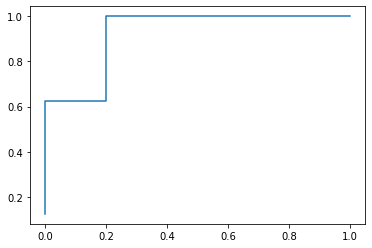

In [ ]:
py.plot(fpr_list,tpr_list)

In [ ]:
fpr_list==0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_score(lab,prob)

0.9526289682539683

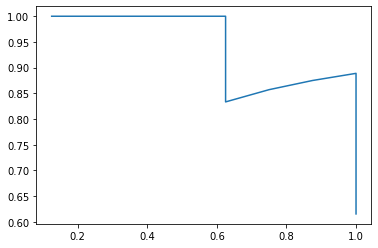

In [ ]:
py.plot(rec_list,pre_list)

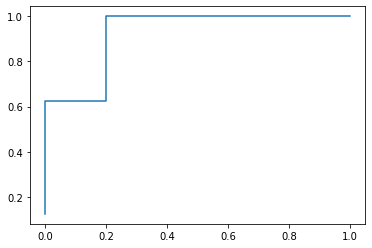

In [ ]:
py.plot(fpr_list,tpr_list)

In [ ]:
cal_precision_recall_f1(lab,prob)

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8333333333333334,
  0.8571428571428571,
  0.875,
  0.8888888888888888,
  0.8,
  0.7272727272727273,
  0.6666666666666666,
  0.6153846153846154],
 [0.125, 0.25, 0.375, 0.5, 0.625, 0.625, 0.75, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.2222222222222222,
  0.4,
  0.5454545454545454,
  0.6666666666666666,
  0.7692307692307693,
  0.7142857142857143,
  0.7999999999999999,
  0.875,
  0.9411764705882353,
  0.888888888888889,
  0.8421052631578948,
  0.8,
  0.761904761904762])

In [ ]:
len(prlist)

13

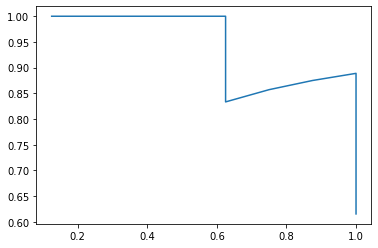

In [ ]:
py.plot(relist,prlist)

In [ ]:
np.mean(precision)

0.9454365079365079

In [ ]:
recall

array([1.   , 0.875, 0.75 , 0.625, 0.625, 0.5  , 0.375, 0.25 , 0.125,
       0.   ])

In [ ]:
relist

[0.125, 0.25, 0.375, 0.5, 0.625, 0.625, 0.75, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
mod.predict_proba

In [ ]:
acc

0.6666666666666666

In [ ]:
i1 = pickle.load(open('images/ผู้ชาย/4.p','rb'))

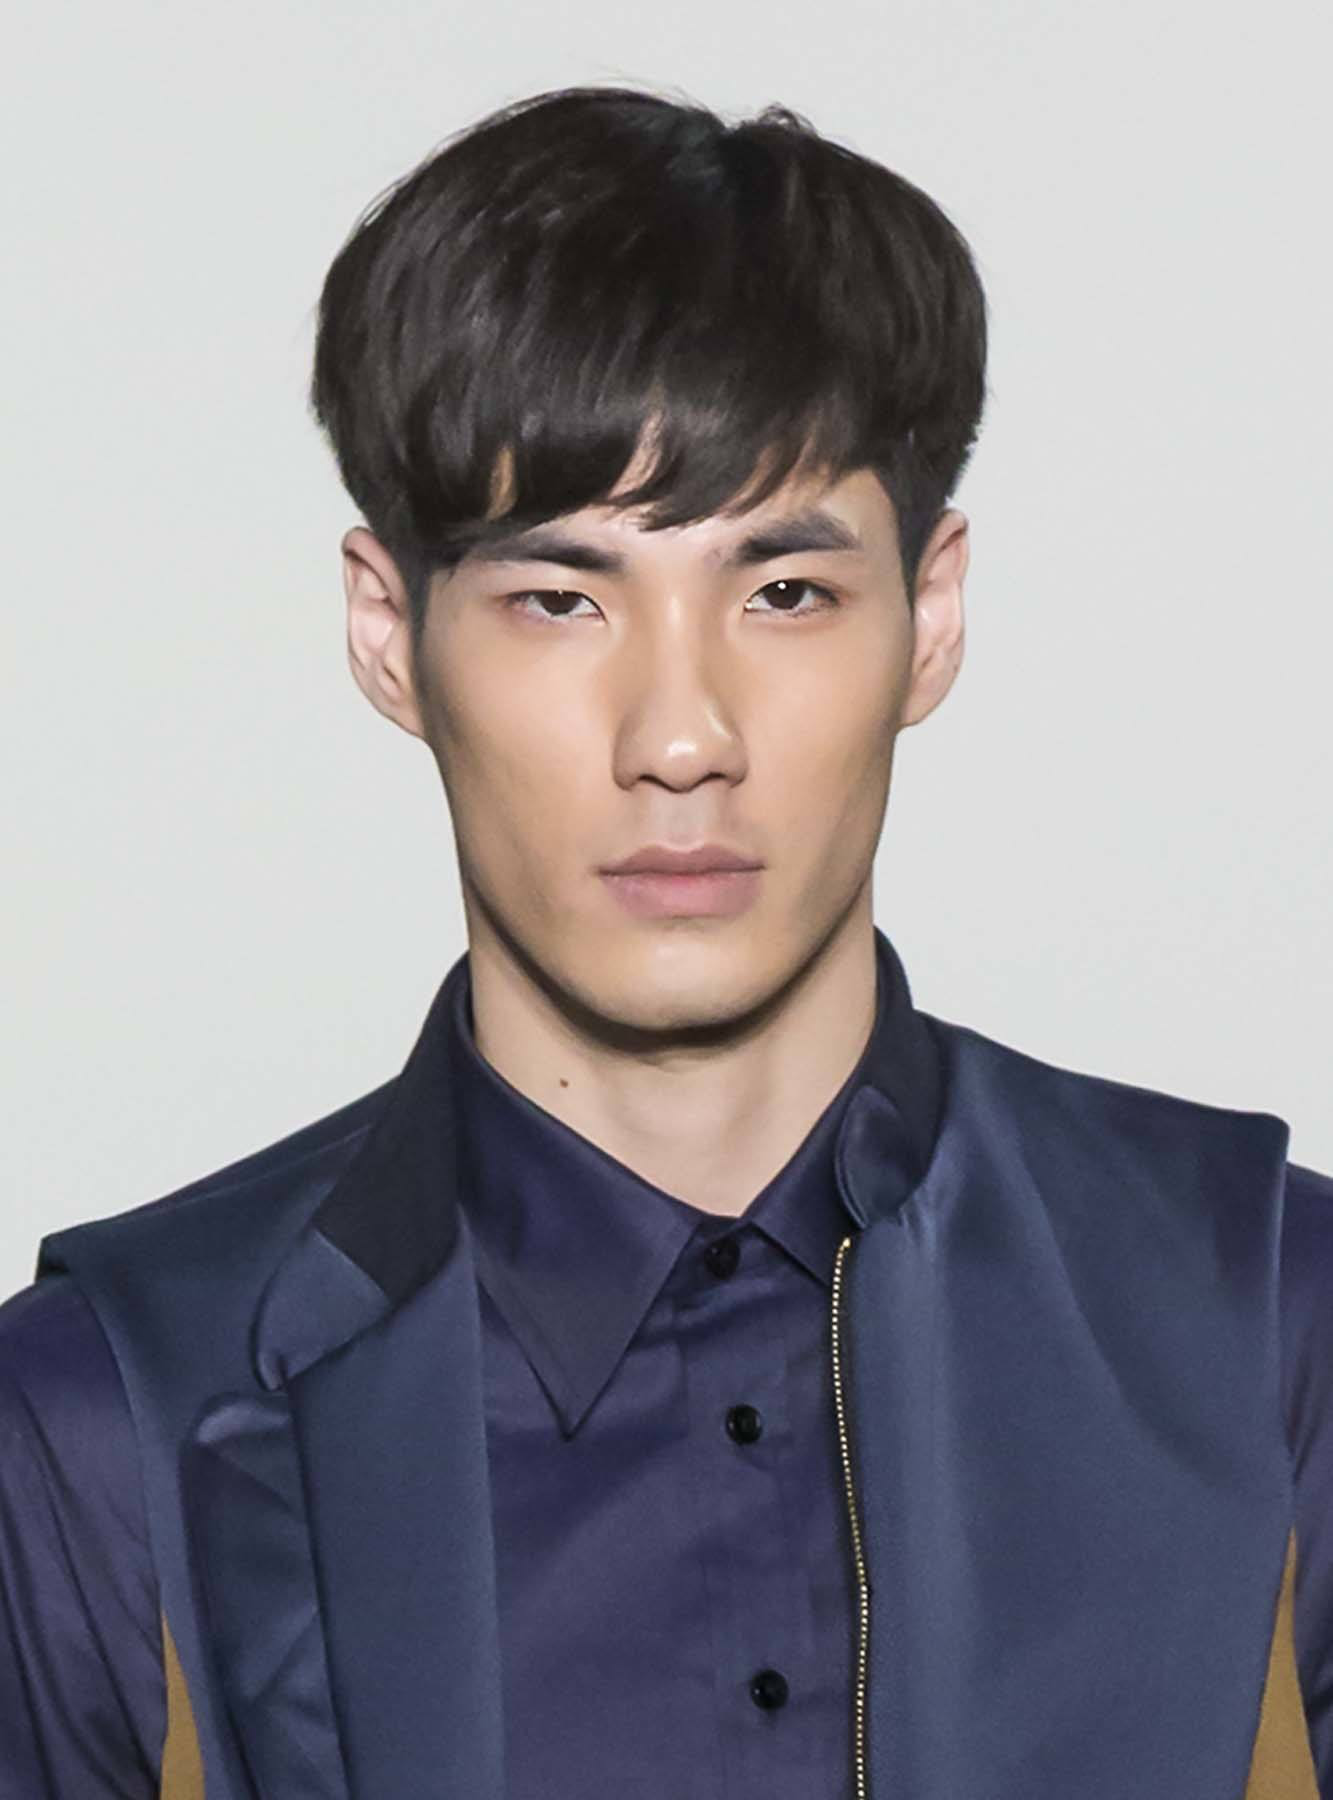

In [ ]:
i1.getimage()

In [ ]:
# output function
modFile = 'vehicle.mod'
mod = pickle.load(open(modFile,'rb'))

In [ ]:
def predictimg(imgurl):
  a = cv.image(imgurl)
  feat = a.getmobilenet()
  res = mod.predict([feat])
  return res

In [ ]:
a=predictimg('https://gd.lnwfile.com/_/gd/_raw/ts/ac/hu.jpg')
a

array(['รถยนต์'], dtype=object)

In [ ]:
!pip install pythainlp

     |████████████████████████████████| 13.1MB 310kB/s 
     |████████████████████████████████| 747kB 40.7MB/s 


In [ ]:
import botnoi as bn

In [ ]:
goodlist = ['น่ารักมาก','สวยจัง','ชอบนะ','ดีจังเลยนะ','สุดยอดไปเลย']
badlist = ['เฮงซวย','ห่วย','แย่สุด ๆ ','โถ่ ไม่ไหวอ่ะ','เชี่ย เอ้ย']

In [ ]:
goodfeat = [bn.nlp.text(sen).getw2v_light() for sen in goodlist]
badfeat = [bn.nlp.text(sen).getw2v_light() for sen in badlist]

In [ ]:
nlpdataset = pd.DataFrame()
nlpdataset['feature'] = goodfeat + badfeat

In [ ]:
nlpdataset['label'] = ['g']*5 + ['b']*5

In [ ]:
clf = LinearSVC()
mod = clf.fit(np.vstack(nlpdataset['feature'].values),nlpdataset['label'].values)

In [ ]:
def predictsentence(sen):
  feat = bn.nlp.text(sen).getw2v_light()
  return mod.predict([feat])[0]